## Summary of what we will be building:-
<div align="center">
<img src="./images/1_summary.png" width=500px>
</div>

In [1]:
# Install the required libraries
!pip3 install numpy           # For Scientific Computation
!pip3 install matplotlib      # For plotting
!pip3 install scikit-learn    # For importing the dataset and plotting metrics


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importing libraries
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# We will fetch the data from sklearn.datasets
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
# Retrieving features and labels
X = mnist['data']
Y = mnist['target']

In [5]:
# Converting into NumPy array with integer datatype
X = np.array(X , dtype = 'int32')
Y = np.array(Y , dtype = 'int32')

In [6]:
print(f'Shape of X is {X.shape}')
print(f'Shape of Y: {Y.shape}')

Shape of X is (70000, 784)
Shape of Y: (70000,)


In [7]:
# Reshaping
X = X.T    # We generally consider Number of examples = Number of columns
Y = Y.reshape(1,70000) 

In [8]:
print(f'Shape of X is {X.shape}')
print(f'Shape of Y: {Y.shape}')

Shape of X is (784, 70000)
Shape of Y: (1, 70000)


In [9]:
# Let's plot the training example at 10th column 
Lets_plot = X[:,10]
Lets_plot_image = Lets_plot.reshape(28,28)
print(Lets_plot_image.shape)

(28, 28)


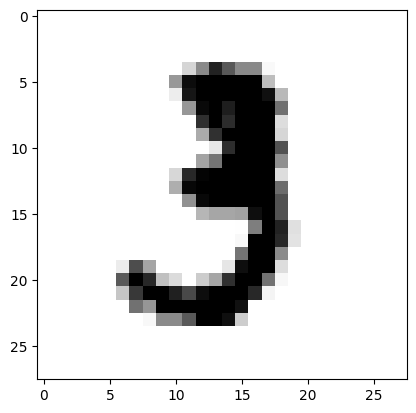

In [10]:
plt.imshow(Lets_plot_image, cmap = matplotlib.cm.binary)

In [11]:
# Label at 10th column should also be 3
Y[0,10]

3

In [12]:
# Let's divide the 70k images dataset into 60k training examples and 10k testing examples
X_train = X[:,:60000]
X_test  = X[:,60000:]
Y_train = Y[:,:60000]
Y_test  = Y[:,60000:]

In [13]:
print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of X_test is {X_test.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train is (784, 60000)
Shape of Y_train: (1, 60000)
Shape of X_test is (784, 10000)
Shape of Y_test: (1, 10000)


In [14]:
# Normalizing data
X_train = X_train / 255
X_test = X_test / 255

In [15]:
def initialize_parameters():
    """
    Initializes the parameters for a simple neural network with one hidden layer.
    The network structure:
    - Input layer: 784 units (e.g., for a flattened 28x28 image)
    - Hidden layer: 16 units
    - Output layer: 10 units (e.g., for 10 classes)
    Returns
    -------
    W1 : numpy.ndarray
        Weight matrix of shape (16, 784) for the connections between the input layer and hidden layer.
    b1 : numpy.ndarray
        Bias vector of shape (16, 1) for the hidden layer.
    W2 : numpy.ndarray
        Weight matrix of shape (10, 16) for the connections between the hidden layer and output layer.
    b2 : numpy.ndarray
        Bias vector of shape (10, 1) for the output layer.

    Notes
    -----
    - Weights are initialized randomly with small values multiplied by 0.01 for better convergence.
    - Biases are initialized to zeros.
    """
    W1 = np.random.randn(16, 784) * 0.01
    W2 = np.random.randn(10, 16) * 0.01
    b1 = np.zeros((16, 1))
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

In [16]:
def ReLU(Z):
    """
    Applies the ReLU (Rectified Linear Unit) activation function.

    ReLU function is defined as: ReLU(x) = max(0, x)

    Parameters
    ----------
    Z : numpy.ndarray
        Input array, can be of any shape.

    Returns
    -------
    numpy.ndarray
        Output array of the same shape as `Z`, where all negative values are replaced with 0.
    """
    return np.maximum(Z, 0)

In [17]:
def SoftMax(Z2):
    """
    Applies the SoftMax activation function.

    SoftMax function is defined as:
    SoftMax(x) = exp(x) / sum(exp(x)) for each element x.

    Parameters
    ----------
    Z2 : numpy.ndarray
        Input array, typically the output of the final layer in a neural network.

    Returns
    -------
    numpy.ndarray
        Output array of the same shape as `Z2`, where values are normalized to represent probabilities.
    """
    A = np.exp(Z2) / np.sum(np.exp(Z2), axis=0, keepdims=True)
    return A

In [18]:
def forward_propagation(W1, b1, W2, b2, X):
    """
    Performs forward propagation through a simple neural network with one hidden layer.

    The network computes:
    1. Z1 = W1 * X + b1
    2. A1 = ReLU(Z1)
    3. Z2 = W2 * A1 + b2
    4. A2 = SoftMax(Z2)

    Parameters
    ----------
    W1 : numpy.ndarray
        Weight matrix for the input layer to hidden layer, shape (hidden_units, input_features).
    b1 : numpy.ndarray
        Bias vector for the hidden layer, shape (hidden_units, 1).
    W2 : numpy.ndarray
        Weight matrix for the hidden layer to output layer, shape (output_units, hidden_units).
    b2 : numpy.ndarray
        Bias vector for the output layer, shape (output_units, 1).
    X : numpy.ndarray
        Input data matrix, shape (input_features, number_of_examples).

    Returns
    -------
    Z1 : numpy.ndarray
        Linear transformation of the input for the hidden layer, shape (hidden_units, number_of_examples).
    A1 : numpy.ndarray
        Activation output from the hidden layer (ReLU applied), shape (hidden_units, number_of_examples).
    Z2 : numpy.ndarray
        Linear transformation for the output layer, shape (output_units, number_of_examples).
    A2 : numpy.ndarray
        Activation output from the output layer (SoftMax applied), shape (output_units, number_of_examples).
    """
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2

In [19]:
def compute_cost(A2, Y):
    """
    Computes the cost using cross-entropy loss.

    Parameters
    ----------
    A2 : numpy.ndarray
        Predicted probabilities of shape (number_of_classes, number_of_samples).
    Y : numpy.ndarray
        One-hot encoded true labels of shape (number_of_classes, number_of_samples).

    Returns
    -------
    float
        The computed cost (scalar value).
    """
    m = Y.size
    cost = -1/m * np.sum(Y * np.log(A2))
    return cost

In [20]:
def one_hot(Y):
    """
    Converts an array of class labels into a one-hot encoded matrix.

    Parameters
    ----------
    Y : numpy.ndarray
        Array of class labels of shape (1,number_of_samples).

    Returns
    -------
    numpy.ndarray
        One-hot encoded matrix of shape (number_of_classes, number_of_samples).
    """
    encoded_array = np.zeros((Y.size, Y.max() + 1))
    encoded_array[np.arange(Y.size), Y] = 1
    encoded_array = encoded_array.T
    return encoded_array

In [21]:
def relu_derivative(Z):
    """
    Computes the derivative of the ReLU activation function.

    Parameters
    ----------
    Z : numpy.ndarray
        Input array of any shape.

    Returns
    -------
    numpy.ndarray
        Array with the same shape as Z, containing 1 for positive values and 0 otherwise.
    """
    return Z >= 0

In [22]:
def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
    """
    Computes the gradients for backpropagation in a neural network.

    Parameters
    ----------
    Z1 : numpy.ndarray
        Linear output of the hidden layer (before activation).
    A1 : numpy.ndarray
        Activation output of the hidden layer.
    Z2 : numpy.ndarray
        Linear output of the output layer (before activation).
    A2 : numpy.ndarray
        Activation output of the output layer (predicted probabilities).
    W2 : numpy.ndarray
        Weights of the output layer.
    X : numpy.ndarray
        Input data of shape (number_of_features, number_of_samples).
    Y : numpy.ndarray
        Array of true labels of shape (number_of_samples,).

    Returns
    -------
    dW1 : numpy.ndarray
        Gradient of the cost with respect to W1.
    db1 : numpy.ndarray
        Gradient of the cost with respect to b1.
    dW2 : numpy.ndarray
        Gradient of the cost with respect to W2.
    db2 : numpy.ndarray
        Gradient of the cost with respect to b2.
    """
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [23]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_rate):
    """
    Updates the parameters using gradient descent.

    Parameters
    ----------
    W1, b1, W2, b2 : numpy.ndarray
        Current weights and biases.
    dW1, db1, dW2, db2 : numpy.ndarray
        Gradients of weights and biases.
    Learning_rate : float
        The learning rate for gradient descent.

    Returns
    -------
    W1, b1, W2, b2 : numpy.ndarray
        Updated weights and biases.
    """
    W1 = W1 - Learning_rate * dW1
    W2 = W2 - Learning_rate * dW2
    b1 = b1 - Learning_rate * db1
    b2 = b2 - Learning_rate * db2
    return W1, b1, W2, b2

In [24]:
def get_predictions(A2):
    """
    Predicts the class labels based on the output probabilities.

    Parameters
    ----------
    A2 : numpy.ndarray
        Output probabilities of shape (number_of_classes, number_of_samples).

    Returns
    -------
    numpy.ndarray
        Predicted class labels of shape (number_of_samples,).
    """
    return np.argmax(A2, 0)

In [25]:
def get_accuracy(predictions, Y):
    """
    Computes the accuracy of the predictions.

    Parameters
    ----------
    predictions : numpy.ndarray
        Predicted class labels of shape (number_of_samples,).
    Y : numpy.ndarray
        True class labels of shape (number_of_samples,).

    Returns
    -------
    float
        The accuracy as a value between 0 and 1.
    """
    return np.sum(predictions == Y) / Y.size

In [26]:
def Gradient_Descent(X, Y, No_Of_Iterations, Learning_Rate):
    """
    Implements the gradient descent algorithm to train the neural network and tracks cost at each iteration.

    Parameters
    ----------
    X : numpy.ndarray
        Input data of shape (number_of_features, number_of_samples).
    Y : numpy.ndarray
        True class labels of shape (number_of_samples,).
    No_Of_Iterations : int
        Number of iterations for gradient descent.
    Learning_Rate : float
        The learning rate for gradient descent.

    Returns
    -------
    W1, b1, W2, b2 : numpy.ndarray
        Trained weights and biases.
    costs : list
        List of costs at each iteration.
    """
    W1, b1, W2, b2 = initialize_parameters()
    costs = []  # List to store costs at each iteration

    for i in range(0, No_Of_Iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        cost = compute_cost(A2, one_hot(Y))
        costs.append(cost)  # Append the current cost to the list
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_Rate)
        if i % 10 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            predictions = get_predictions(A2)
            print("Accuracy: " + str(get_accuracy(predictions, Y)))

    return W1, b1, W2, b2, costs

In [27]:
W1, b1, W2, b2, costs = Gradient_Descent(X_train, Y_train, 1000, 0.1)

Cost after iteration 0: 0.23023713842640617
Accuracy: 0.13716666666666666
Cost after iteration 10: 0.23007976718150192
Accuracy: 0.19215
Cost after iteration 20: 0.22977126156150984
Accuracy: 0.20681666666666668
Cost after iteration 30: 0.2290573379877942
Accuracy: 0.21338333333333334
Cost after iteration 40: 0.2273653531955007
Accuracy: 0.2147
Cost after iteration 50: 0.22373770368656387
Accuracy: 0.21915
Cost after iteration 60: 0.2176301224310317
Accuracy: 0.24388333333333334
Cost after iteration 70: 0.2094665770281659
Accuracy: 0.29888333333333333
Cost after iteration 80: 0.19852667441623184
Accuracy: 0.3702
Cost after iteration 90: 0.18309138264416197
Accuracy: 0.45766666666666667
Cost after iteration 100: 0.16345359577048466
Accuracy: 0.5545333333333333
Cost after iteration 110: 0.14347064165862597
Accuracy: 0.6229
Cost after iteration 120: 0.12618350636119194
Accuracy: 0.6763666666666667
Cost after iteration 130: 0.11228146740772939
Accuracy: 0.7195833333333334
Cost after iterat

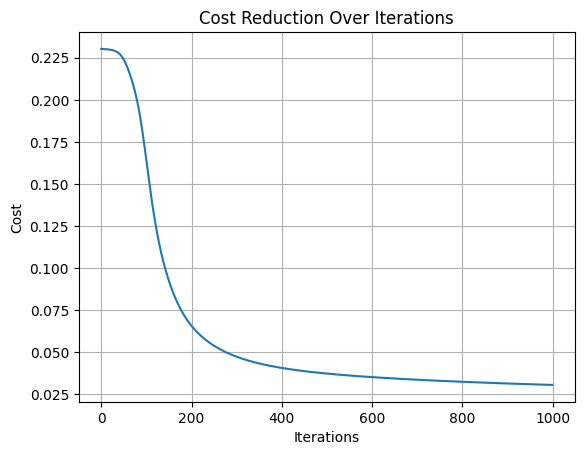

In [28]:
# Plot cost Vs Iterations
plt.plot(costs)
plt.title('Cost Reduction Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [29]:
# Find accuracy of model on test data
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_test)
predictions = get_predictions(A2)
print("Accuracy  :" + str(get_accuracy(predictions, Y_test)))

Accuracy  :0.9154


In [30]:
print(f'Shape of predictions is {predictions.shape}')
print(f'Shape of Y_test is {Y_test.shape}')
Y_test = Y_test.flatten()
print(f'Shape of predictions is {predictions.shape}')
print(f'Shape of Y_test is {Y_test.shape}')

Shape of predictions is (10000,)
Shape of Y_test is (1, 10000)
Shape of predictions is (10000,)
Shape of Y_test is (10000,)


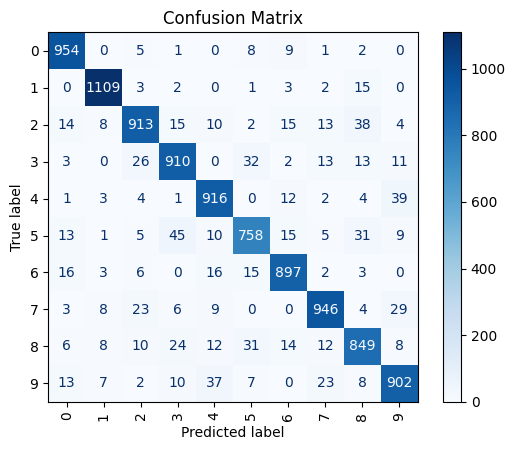

In [31]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

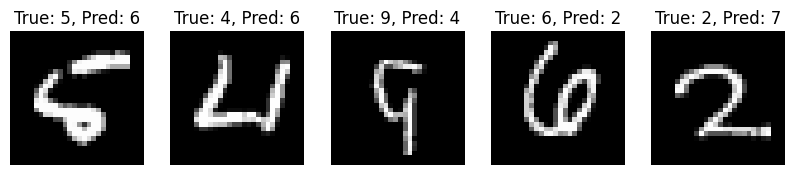

In [32]:
# Find misclassified indices
misclassified_indices = np.where(predictions != Y_test)[0]

# Plot the first 5 misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[:, index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {Y_test[index]}, Pred: {predictions[index]}")
    plt.axis('off')
plt.show()